# DoomTakeCover-v0

In [1]:
import numpy as np
import os
import json
import tensorflow as tf
import random
from vae.vae import CVAE
from controller import make_controller
from env import make_env
from utils import PARSER
args = PARSER.parse_args(['--config_path', 'configs/doom.config'])

In [2]:
import matplotlib.pyplot as plt
import matplotlib.animation
%matplotlib inline
np.set_printoptions(precision=4, edgeitems=6, linewidth=100, suppress=True)

In [3]:
os.environ["CUDA_VISIBLE_DEVICES"]="-1" # disable GPU

DATA_DIR = "results/{}/{}/record".format(args.exp_name, args.env_name)
model_path_name = "results/{}/{}/tf_vae".format(args.exp_name, args.env_name)

In [4]:
filelist = os.listdir(DATA_DIR)

In [5]:
obs = np.load(os.path.join(DATA_DIR, random.choice(filelist)))["obs"]
obs = obs.astype(np.float32)/255.0

In [6]:
obs.shape

(584, 64, 64, 3)

In [7]:
frame = random.choice(obs).reshape(1, 64, 64, 3)

In [8]:
vae = CVAE(args)

vae.set_weights(tf.keras.models.load_model(model_path_name, compile=False).get_weights())


Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc51cf0fa90> and <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc51cf16048>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc51cf16048> and <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc51cf16908>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc51cf16908> and <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc51cf1b208>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc51cf1b208> and <tensorflow.python.keras.layers.core.Flatten object at 0x7fc51cf1b940>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.core.Dense object at 0x7fc51cf

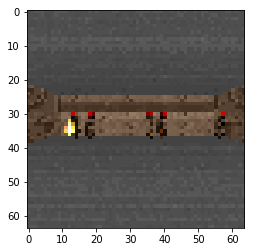

In [9]:
%matplotlib inline
# show recorded frame that will be fed into the input of VAE
plt.imshow(frame[0])
plt.show()

In [10]:
batch_z = vae.encode(frame)
print(batch_z[0]) # print out sampled z
reconstruct = vae.decode(batch_z)

tf.Tensor(
[-0.2979 -0.029  -1.7664  1.4185  1.6364 -1.1808 -0.2175  0.6362  0.7169 -0.0031  0.1024  0.8084
 -0.0644  1.0853  0.0137  1.4735 -0.0933 -0.8344  1.3302 -0.6853  0.6148 -1.1444 -0.3511  0.017
  0.6572  1.0566  0.1946 -1.3639 -2.4385 -0.0141  0.8665  1.0259 -0.9506  0.1336  0.8278  0.2331
  1.4811 -1.7316  0.695  -0.8018 -0.1532  1.5717 -0.8614 -0.699   1.0544 -0.2382  0.8962  0.0611
 -1.8049 -0.1315 -0.3041 -1.304  -0.2056  0.7969  0.951   0.2306 -0.4167  0.3127  0.8321 -0.3333
  0.8457  0.0998  1.9352 -1.3058], shape=(64,), dtype=float32)


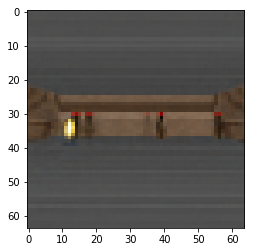

In [11]:
%matplotlib inline
# show reconstruction
plt.imshow(reconstruct[0])
plt.show()

## Dream Samples

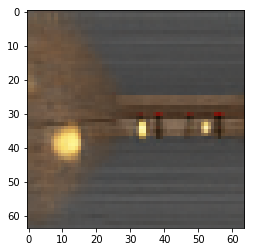

In [12]:
%matplotlib inline
batch_z = tf.random.normal((1, args.z_size)).numpy()
reconstruct = vae.decode(batch_z)
# show reconstruction
plt.imshow(reconstruct[0])
plt.show()

# Simulate and Store for Animation

In [13]:
def sim(c, env, vae, is_true_env=False, z_size=64, max_ep_len=1000):
    o = env.reset()
    r_list = []
    total_r_list = []
    true_frames = []
    if is_true_env:
        o, frame = o
        true_frames.append(tf.squeeze(frame))
        z = np.expand_dims(o[:z_size], axis=0)
        reconstruct = vae.decode(z)
    else:
        z = np.expand_dims(o[:z_size], axis=0)
        reconstruct = vae.decode(z)
    decoded_frames = [tf.squeeze(reconstruct)]
    
    for _ in range(max_ep_len): # episode length is a thousand
        a = c.get_action(o)
        o, r, d, _ = env.step(a)
        r_list.append(r)
        total_r_list.append(sum(r_list))
        if is_true_env:
            env.render('rgb_array')
            o, frame = o
            true_frames.append(tf.squeeze(frame))
            z = np.expand_dims(o[:z_size], axis=0)
            reconstruct = vae.decode(z)
        else:
            z = np.expand_dims(o[:z_size], axis=0)
            reconstruct = vae.decode(z)
        decoded_frames.append(tf.squeeze(reconstruct))
        
        if d:
            break
    return decoded_frames, true_frames, r_list, total_r_list

## Acting in dream environment
visualize what the agent sees when acting in the dream environment

In [14]:
c = make_controller(args)
c.load_model('results/{}/{}/log/{}.cma.16.64.json'.format(args.exp_name, args.env_name, args.env_name))
true_env = make_env(args, dream_env=True, with_obs=True)
reconstruct_episode, _, dream_r, dream_total_r = sim(c, true_env, vae, is_true_env=False, z_size=args.z_size, max_ep_len=args.max_frames)
true_env.close()

loading file results/WorldModels/DoomTakeCover-v0/log/DoomTakeCover-v0.cma.16.64.json
making rnn doom environment

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc5103f7198> and <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc5103f7a58>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc5103f7a58> and <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc51037f358>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc51037f358> and <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc51037fc18>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc51037fc18> and <tensorflow.python.keras.layers.core.Flatten object at 0x7fc510384390>).

Two c

<IPython.core.display.Javascript object>


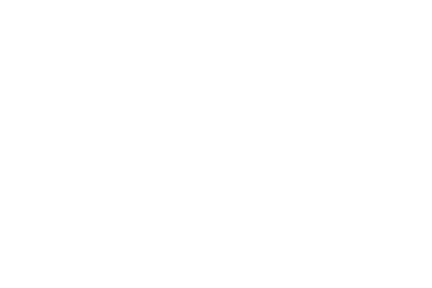

<IPython.core.display.Javascript object>


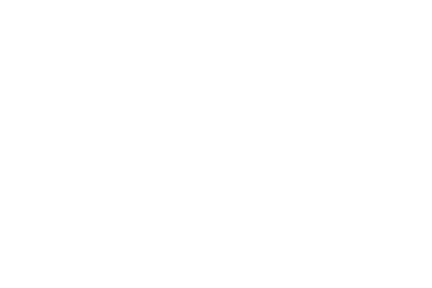

Traceback (most recent call last):
  File "/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/__init__.py", line 215, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/matplotlib/animation.py", line 1478, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [15]:
%matplotlib notebook
%matplotlib notebook
%matplotlib notebook
# stupid jupyter bug, just keep copy pasting until it works

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation

f = plt.figure()
ax = f.gca()

image = plt.imshow(reconstruct_episode[0].numpy(), interpolation='None', animated=True)

def function_for_animation(frame_index):
    image.set_data(reconstruct_episode[frame_index+1].numpy())
    ax.set_title('frame: {}, r: {:.2f}, total reward: {:.2f}'.format(frame_index, dream_r[frame_index+1], dream_total_r[frame_index+1]))
    return image,

ani = matplotlib.animation.FuncAnimation(f, function_for_animation, interval=40, frames=len(reconstruct_episode), blit=True)


## Acting in true environment
visualize what the agent sees when acting in the true environment

In [16]:
c = make_controller(args)
c.load_model('results/{}/{}/log/{}.cma.16.64.json'.format(args.exp_name, args.env_name, args.env_name))
true_env = make_env(args, dream_env=False, with_obs=True)
reconstruct_episode, true_episode, true_r, true_total_r = sim(c, true_env, vae, is_true_env=True, z_size=args.z_size, max_ep_len=args.max_frames)
true_env.close()

loading file results/WorldModels/DoomTakeCover-v0/log/DoomTakeCover-v0.cma.16.64.json
making real doom environment

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc4f05185c0> and <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc4f0518c88>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc4f0518c88> and <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc4f051d588>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc4f051d588> and <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc4f051de48>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc4f051de48> and <tensorflow.python.keras.layers.core.Flatten object at 0x7fc4f05225c0>).

Two 

<IPython.core.display.Javascript object>


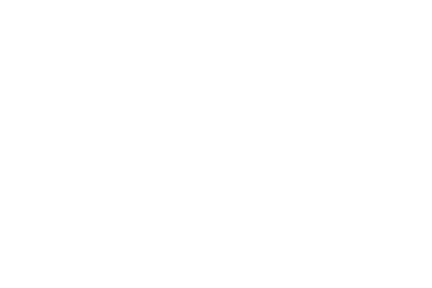

<IPython.core.display.Javascript object>


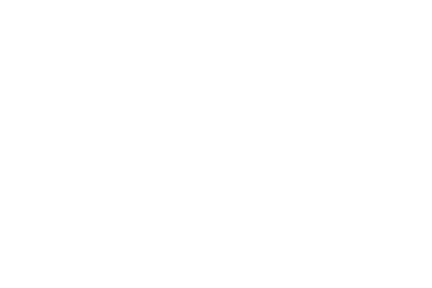

Traceback (most recent call last):
  File "/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/__init__.py", line 215, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/matplotlib/animation.py", line 1478, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [17]:
%matplotlib notebook
# stupid jupyter bug, just keep copy pasting until it works

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation

f = plt.figure()
ax = f.gca()

image = plt.imshow(true_episode[0].numpy(), interpolation='None', animated=True)

def function_for_animation(frame_index):
    image.set_data(true_episode[frame_index+1].numpy())
    ax.set_title('frame: {}, r: {:.2f}, total reward: {:.2f}'.format(frame_index, true_r[frame_index+1], true_total_r[frame_index+1]))
    return image,

ani = matplotlib.animation.FuncAnimation(f, function_for_animation, interval=40, frames=len(true_episode), blit=True)


## Return Table for Controller

In [18]:
eager_filepath = os.path.join('results/{}/{}/log/{}.cma.16.64.eval_hist.json'.format(args.exp_name, args.env_name, args.env_name))

with open(eager_filepath, 'r') as f:
  eager_data = json.load(f)
eager_data = np.array(eager_data)

eager_generation = int(eager_data[20, 0])
eager_ret = eager_data[20, 1]
eager_std = eager_data[20, 2]

og_generation = 2000
og_tau_1_ret = 868.0
og_tau_1_std = 511.0

print(eager_generation, eager_ret, eager_std)
print(og_generation, og_tau_1_ret, og_tau_1_std)

200 867.27 557.0653436536866
2000 868.0 511.0


|  | generation | returns &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|
|------|------|---------|
|   OG WorldModels  | 2000 | $868 \pm 511$ |
|   Eager WorldModels  | 200 | $867 \pm 557$ |

# CarRacing-v0

In [27]:
import numpy as np
import os
import json
import tensorflow as tf
import random
from vae.vae import CVAE
from controller import make_controller
from env import make_env
from utils import PARSER
args = PARSER.parse_args(['--config_path', 'configs/carracing.config'])

In [28]:
import matplotlib.pyplot as plt
import matplotlib.animation
%matplotlib inline
np.set_printoptions(precision=4, edgeitems=6, linewidth=100, suppress=True)

In [29]:
os.environ["CUDA_VISIBLE_DEVICES"]="-1" # disable GPU

DATA_DIR = "results/{}/{}/record".format(args.exp_name, args.env_name)
model_path_name = "results/{}/{}/tf_vae".format(args.exp_name, args.env_name)

In [30]:
filelist = os.listdir(DATA_DIR)

In [31]:
obs = np.load(os.path.join(DATA_DIR, random.choice(filelist)))["obs"]
obs = obs.astype(np.float32)/255.0

In [32]:
obs.shape

(1000, 64, 64, 3)

In [33]:
frame = random.choice(obs).reshape(1, 64, 64, 3)

In [34]:
vae = CVAE(args)

vae.set_weights(tf.keras.models.load_model(model_path_name, compile=False).get_weights())


Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fe874595978> and <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fe874522588>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fe874522588> and <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fe874522e48>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fe874522e48> and <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fe874525748>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fe874525748> and <tensorflow.python.keras.layers.core.Flatten object at 0x7fe874525e80>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.core.Dense object at 0x7fe8745

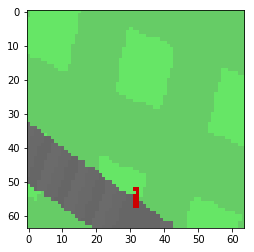

In [35]:
%matplotlib inline
# show recorded frame that will be fed into the input of VAE
plt.imshow(frame[0])
plt.show()

In [36]:
batch_z = vae.encode(frame)
print(batch_z[0]) # print out sampled z
reconstruct = vae.decode(batch_z)

tf.Tensor(
[-0.7673  0.3789 -1.5014  1.1046  0.0796 -1.7748 -0.1853  0.5527 -0.1587  0.9208  0.2796 -1.2788
  0.804   0.0271 -0.331   1.3147 -1.1412 -0.8247 -0.9669 -1.3371 -0.3056 -1.8733 -0.0352  0.3039
  1.3125  0.8344  1.1412 -0.8133 -0.2723 -1.2381  1.1208 -1.5745], shape=(32,), dtype=float32)


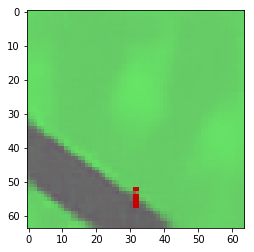

In [37]:
%matplotlib inline
# show reconstruction
plt.imshow(reconstruct[0])
plt.show()

## Dream Samples

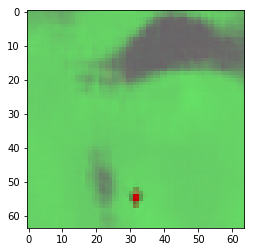

In [38]:
%matplotlib inline
batch_z = tf.random.normal((1, args.z_size)).numpy()
reconstruct = vae.decode(batch_z)
# show reconstruction
plt.imshow(reconstruct[0])
plt.show()

## Driving in true environment
visualize what the agent sees when driving in the true environment

In [39]:
c = make_controller(args)
c.load_model('results/{}/{}/log/{}.cma.16.64.json'.format(args.exp_name, args.env_name, args.env_name))
true_env = make_env(args, dream_env=False, with_obs=True)
reconstruct_episode, true_episode, true_r, true_total_r = sim(c, true_env, vae, is_true_env=True, z_size=args.z_size, max_ep_len=args.max_frames)
true_env.close()

loading file results/WorldModels/CarRacing-v0/log/CarRacing-v0.cma.16.64.json
making real CarRacing environment


NameError: name 'sim' is not defined

<IPython.core.display.Javascript object>


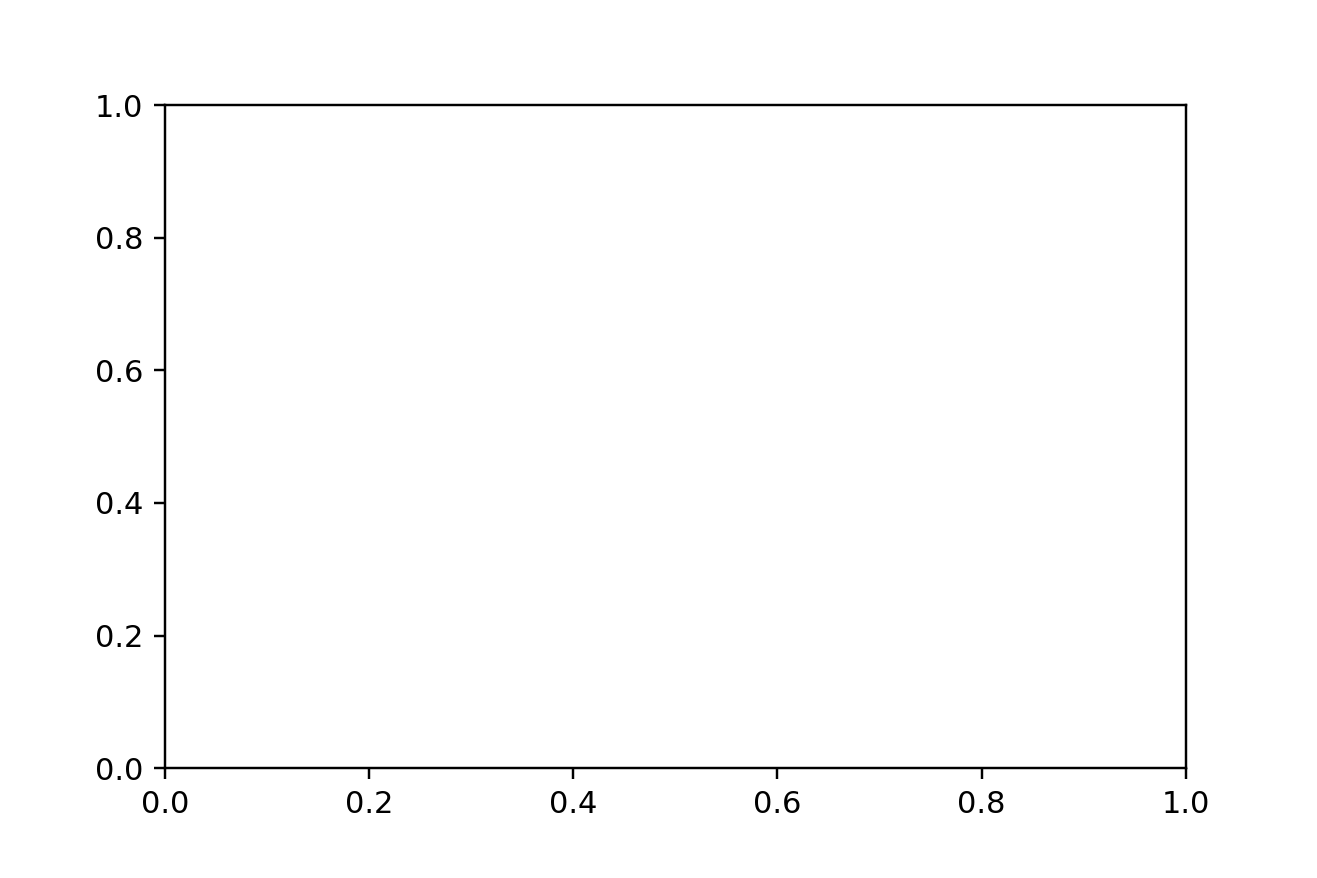

NameError: name 'true_episode' is not defined

In [15]:
%matplotlib notebook
%matplotlib notebook
%matplotlib notebook
%matplotlib notebook
# stupid jupyter bug, just keep copy pasting until it works

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation

f = plt.figure()
ax = f.gca()

image = plt.imshow(true_episode[0].numpy(), interpolation='None', animated=True)

def function_for_animation(frame_index):
    image.set_data(reconstruct_episode[frame_index+1].numpy())
    ax.set_title('frame: {}, r: {:.2f}, total reward: {:.2f}'.format(frame_index, true_r[frame_index+1], true_total_r[frame_index+1]))
    return image,

ani = matplotlib.animation.FuncAnimation(f, function_for_animation, interval=40, frames=len(true_episode), blit=True)


## Return Plot for Controller

In [68]:
eager_filepath = os.path.join('results/{}/{}/log/{}.cma.16.4.eval_hist.json'.format(args.exp_name, args.env_name, args.env_name))
og_filepath = os.path.join('results/og/log', 'carracing.cma.16.64.hist_best.json')
with open(eager_filepath, 'r') as f:
  eager_data = json.load(f)
with open(og_filepath, 'r') as f:
  og_data = json.load(f)

eager_data = np.array(eager_data)
og_data = np.array(og_data)

eager_comparison_max = eager_data[-1, 0] # b/c we didnt run for 2k
og_max_idx = np.sum(np.array(og_data[: ,0],dtype=np.float) <= eager_comparison_max)
print(og_max_idx)

og_data = np.array(og_data)[:og_max_idx]

4


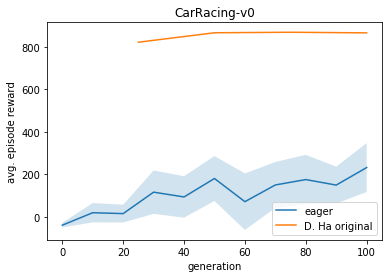

In [69]:
%matplotlib inline

eager_x = eager_data[:, 0]
eager_ret = eager_data[:, 1]
eager_std = eager_data[:, 2]

og_x = np.array(og_data[:, 0], dtype=np.float)
og_ret = np.array(og_data[:, 5], dtype=np.float)
# don't have access to standard deviation of the og evaluation

plt.figure()
plt.plot(eager_x, eager_ret)
plt.fill_between(eager_x, eager_ret-eager_std, eager_ret+eager_std, alpha=0.2)
plt.plot(og_x, og_ret)

plt.title('CarRacing-v0')
plt.ylabel('avg. episode reward')
plt.xlabel('generation')
plt.legend(['eager', 'D. Ha original'])